### This file is for machine learning modeling and data optimization

In [2]:
import pandas as pd
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data/final_data.csv')
print(df)
df.describe()

     molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL133897              CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1   
1          CHEMBL336398         O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1   
2          CHEMBL131588  CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1   
3          CHEMBL130628      O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F   
4          CHEMBL130478          CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C   
...                 ...                                                ...   
7541      CHEMBL5219046      CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1   
7542      CHEMBL5219594             O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1   
7543      CHEMBL5219958         CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1   
7544           CHEMBL95                            Nc1c2c(nc3ccccc13)CCCC2   
7545      CHEMBL5220884  Cn1ccc2cc(-c3cnc4ccc(C(=O)N5CCCCC5)cc4n3)ccc2c1=O   

     bioactivity_class     MW  LogP  NumHDonors  NumHAcceptors 

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,7546.00,7546.00,7546.00,7546.00,7546.00
mean,405.22,3.94,1.09,4.35,5.99
std,131.94,2.36,1.08,1.95,1.59
min,61.04,-6.62,0.00,0.00,1.30
25%,317.42,2.70,0.00,3.00,4.92
50%,389.50,4.01,1.00,4.00,5.89
75%,482.70,5.25,2.00,6.00,7.03
max,1235.46,13.51,13.00,22.00,14.30


In [4]:
def pIC50(input):
    pIC50_smallerthan125 = []

    for i in input['pIC50']:
        if i > 12.5:
            i = 12.5 # Converts nM to M
        pIC50_smallerthan125.append(i)

    input['pIC50_smallerthan125'] = pIC50_smallerthan125
    x = input.drop('pIC50', axis = 1)
        
    return x

In [5]:
df_smallerthan125 = pIC50(df)
df_smallerthan125.describe()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50_smallerthan125
count,7546.00,7546.00,7546.00,7546.00,7546.00
mean,405.22,3.94,1.09,4.35,5.98
std,131.94,2.36,1.08,1.95,1.56
min,61.04,-6.62,0.00,0.00,1.30
25%,317.42,2.70,0.00,3.00,4.92
50%,389.50,4.01,1.00,4.00,5.89
75%,482.70,5.25,2.00,6.00,7.03
max,1235.46,13.51,13.00,22.00,12.50


In [6]:
df_X = pd.read_csv('data/data_XandY.csv')
df_X = df_X.drop('pIC50',axis=1)

In [12]:
import pickle
features = pickle.load(open("data/selected_features.pkl","rb"))
df_X = df_X[features]
df_X
df_X.to_csv('data/Xdata_7546*456.csv',index=False)

In [7]:
X = df_X.to_numpy()
Y = df_smallerthan125.pIC50_smallerthan125
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)


In [8]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [04:38<00:00,  6.63s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [04:04<00:00,  5.83s/it]


In [9]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.75,0.79,0.72,0.37
ExtraTreeRegressor,0.75,0.79,0.72,0.39
ExtraTreesRegressor,0.75,0.79,0.72,16.95
GaussianProcessRegressor,0.75,0.79,0.72,27.39
RandomForestRegressor,0.70,0.74,0.79,11.51
BaggingRegressor,0.67,0.72,0.82,1.40
XGBRegressor,0.58,0.64,0.93,2.99
MLPRegressor,0.58,0.64,0.94,9.04
HistGradientBoostingRegressor,0.44,0.53,1.07,3.33


In [10]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,-0.48,0.38,1.25,3.16
LGBMRegressor,-0.50,0.38,1.26,0.61
SVR,-0.58,0.34,1.29,18.19
NuSVR,-0.59,0.34,1.29,13.18
RandomForestRegressor,-0.60,0.34,1.30,11.44
XGBRegressor,-0.60,0.33,1.30,3.18
BaggingRegressor,-0.68,0.30,1.33,1.25
GradientBoostingRegressor,-0.69,0.30,1.33,4.38
RidgeCV,-0.69,0.30,1.33,1.18


<Axes: xlabel='pIC50_smallerthan125'>

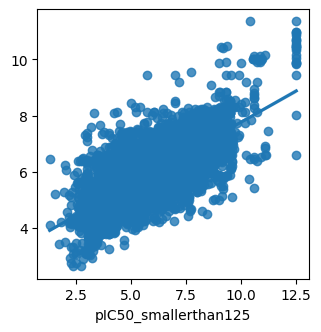

In [11]:
import lightgbm as ltb
import seaborn as sns
import matplotlib.pyplot as plt
model = ltb.LGBMRegressor()
model.fit(X,Y)
y_predicted = model.predict(X)
y_expected = Y
plt.figure(figsize=(3.5,3.5))
sns.regplot(x = y_expected, y = y_predicted, fit_reg=True)